In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3fd03a55-a7f9-449b-bf0a-d99c291cc879',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-11T19:55:59.652Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 10081}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11107, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [6]:
type(data)

dict

In [9]:
import pandas as pd

pd.set_option('display.max_rows', None) #allows me to see all rows.
pd.set_option('display.max_columns', None) #allows me to see all columns

In [10]:
df = pd.json_normalize(data['data']) # normalizes data and makes it fit the dataframe. 
df['timestamp'] = pd.to_datetime('now') # takes the timestamp of RIGHT NOW. and the creating of new column.
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11107,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971099e+07,1.971099e+07,False,NaN,1,NaN,NaN,None,2024-06-11T19:54:00.000Z,67538.782210,3.705243e+10,91.8161,0.586682,-2.871653,-3.900172,10.043543,1.022684,-7.597098,1.331256e+12,54.5196,1.418314e+12,None,2024-06-11T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 20:56:17.906182
1,1027,Ethereum,ETH,ethereum,9056,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201430e+08,1.201430e+08,True,NaN,2,NaN,NaN,None,2024-06-11T19:53:00.000Z,3501.622847,1.923954e+10,92.2386,0.232792,-4.680043,-7.636330,19.622597,9.203515,-12.314698,4.206954e+11,17.2501,4.206954e+11,None,2024-06-11T19:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 20:56:17.906182
2,825,Tether USDt,USDT,tether,88280,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.124963e+11,1.150861e+11,True,NaN,3,NaN,NaN,None,2024-06-11T19:53:00.000Z,0.999915,7.250230e+10,48.4914,0.014177,0.004595,-0.029266,0.024881,-0.021207,-0.123478,1.124867e+11,4.6067,1.150763e+11,None,2024-06-11T19:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-11 20:56:17.906182
3,1839,BNB,BNB,bnb,2181,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475844e+08,1.475844e+08,False,NaN,4,NaN,NaN,None,2024-06-11T19:53:00.000Z,608.903569,3.041048e+09,15.0858,-0.014737,-6.304501,-9.226318,1.895016,3.870142,2.194126,8.986468e+10,3.6813,8.986468e+10,None,2024-06-11T19:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 20:56:17.906182
4,5426,Solana,SOL,solana,680,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.609470e+08,5.778570e+08,True,NaN,5,NaN,NaN,None,2024-06-11T19:53:00.000Z,149.337442,2.773316e+09,65.1421,0.445680,-7.167168,-11.486297,3.047434,0.245721,-7.691738,6.883664e+10,2.8226,8.629569e+10,None,2024-06-11T19:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 20:56:17.906182
5,3408,USDC,USDC,usd-coin,19690,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.202005e+10,3.202005e+10,False,NaN,6,NaN,NaN,None,2024-06-11T19:53:00.000Z,1.000100,6.721419e+09,43.7547,0.000033,0.006659,-0.001968,0.011590,0.012935,0.015263,3.202325e+10,1.3118,3.202325e+10,None,2024-06-11T19:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-11 20:56:17.906182
6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.550616e+10,9.998755e+10,False,NaN,7,NaN,NaN,None,2024-06-11T19:54:00.000Z,0.479643,1.527454e+09,42.7790,-0.358023,-3.532465,-8.982963,-4.367179,-10.217848,-29.970477,2.662314e+10,1.0906,4.796431e+10,None,2024-06-11T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 20:56:17.906182
7,74,Dogecoin,DOGE,dogecoin,985,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.446691e+11,1.446691e+11,True,NaN,8,NaN,NaN,None,2024-06-11T19:54:00.000Z,0.138216,1.267736e+09,78.1494,0.588383,-4.520284,-13.953530,-1.944813,-17.907650,-17.920140,1.999557e+10,0.8189,1.999557e+10,None,2024-06-11T19:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 20:56:17.906182
8,11419,Toncoin,TON,toncoin,393,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.431743e+0

In [ ]:
def api_runner(): # press tab on every line  to make sure everything is formatted properly. 
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3fd03a55-a7f9-449b-bf0a-d99c291cc879',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
  #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
   #df = pd.concat([df, df2], ignore_index=True)    
    
#THIS CODE SAYS THAT WHEN NEW DATA COMES NEW DF will be
#created time stamp will be added and it will be appended to original data.
    
    
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now') 
    
    
    if not os.path.isfile(r'C:\Users\Simon\Desktop\Data\API Learning\API.csv'):
        df.to_csv(r'C:\Users\Simon\Desktop\Data\API Learning\API.csv', header = 'column_names')
# checks if first line file exists. IF IT DOES NOT then it will create it and create column headers
# based off the dataframe. 
    else:
           df.to_csv(r'C:\Users\Simon\Desktop\Data\API Learning\API.csv', mode = 'a', header = False) 
# if theres already api file there. We just want to append the data not OVERWRITE. 
# mode = 'a' basically means append. 
# header = false means when data gets appended its not going to use column headers every time. 

In [58]:
import os 
from time import time
from time import sleep # this code helps you to call the code in certain intervals 

for i in range(333): # you only have 333 runs per day
    api_runner()
    print('api runner Completed Succsessfully')
    sleep(60) # it sleeps for 1 minute. Will wait for 60 secs then run AGAIN. 
exit()

{'status': {'timestamp': '2024-06-11T20:27:22.471Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 10082}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11107, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2024-06-11T20:28:23.025Z', 'error_code': 0, 'error_message': None, 'elapsed': 43, 'credit_count': 1, 'notice': None, 'total_count': 10082}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11107, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2024-06-11T20:29:23.571Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 10082}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11107, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [34]:
df72 = pd.read_csv(r'C:\Users\Simon\Desktop\Data\API Learning\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11107,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19710950.00000,19710950.00000,False,NaN,1,NaN,NaN,NaN,2024-06-11T17:24:00.000Z,66272.78907,35878965825.86869,95.20310,-0.28476,-5.17573,-6.09832,7.84667,-2.93142,-9.03790,1306299631733.80957,54.20820,1391728570485.43994,NaN,2024-06-11T17:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 18:25:35.673126
1,1,1027,Ethereum,ETH,ethereum,9055,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120142969.93913,120142969.93913,True,NaN,2,NaN,NaN,NaN,2024-06-11T17:23:00.000Z,3440.04500,18310295474.59270,88.26370,-0.71293,-6.76448,-9.91879,17.23819,1.59128,-13.47695,413297223480.10095,17.13990,413297223480.09998,NaN,2024-06-11T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 18:25:35.673126
2,2,825,Tether USDt,USDT,tether,88278,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112496265357.22896,115086088089.30902,True,NaN,3,NaN,NaN,NaN,2024-06-11T17:23:00.000Z,0.99958,70426916785.62953,49.41060,-0.01044,-0.02292,-0.05931,-0.01929,0.02306,-0.14668,112448631497.87505,4.66630,115037357631.31000,NaN,2024-06-11T17:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-11 18:25:35.673126
3,3,1839,BNB,BNB,bnb,2180,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147584423.40462,147584423.40462,False,NaN,4,NaN,NaN,NaN,2024-06-11T17:23:00.000Z,598.66204,3001259095.64373,16.36190,-0.32398,-7.51012,-10.30564,0.57820,-1.68550,1.69574,88353192575.66937,3.66570,88353192575.67000,NaN,2024-06-11T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 18:25:35.673126
4,4,5426,Solana,SOL,solana,680,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,460947966.28958,577858021.04939,True,NaN,5,NaN,NaN,NaN,2024-06-11T17:23:00.000Z,145.87380,2600875386.14218,56.73460,-1.96499,-9.76221,-13.58381,0.50800,-11.50525,-7.89125,67240231077.63183,2.78850,84294344930.49001,NaN,2024-06-11T17:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 18:25:35.673126
5,5,3408,USDC,USDC,usd-coin,19690,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31936268182.20878,31936268182.20878,False,NaN,6,NaN,NaN,NaN,2024-06-11T17:23:00.000Z,1.00001,6573470634.90950,50.64140,-0.01538,-0.00097,-0.01639,-0.00896,0.00009,0.00905,31936636684.52367,1.32500,31936636684.52000,NaN,2024-06-11T17:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-11 18:25:35.673126
6,6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55506158411.00000,99987553871.00000,False,NaN,7,NaN,NaN,NaN,2024-06-11T17:24:00.000Z,0.47338,1491621627.13846,46.25280,-1.02562,-5.46306,-10.41846,-5.91392,-19.81947,-30.61218,26275284060.23898,1.09010,47337601470.60000,NaN,2024-06-11T17:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 18:25:35.673126
7,7,74,Dogecoin,DOGE,dogecoin,985,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144667466383.70523,144667466383.70523,True,NaN,8,NaN,NaN,NaN,2024-06-11T17:24:00.000Z,0.13458,1168025241.62083,66.47470,-2.25383,-7.68210,-16.32635,-5.33134,-29.21637,-19.96515,19469299986.60836,0.80840,19469299986.61000,NaN,2024-0

In [35]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) # this helps the numbers look @ max_supply column. 

In [36]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11107,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19710993.00000,19710993.00000,False,NaN,1,NaN,NaN,None,2024-06-11T20:06:00.000Z,67305.92973,36984292595.62746,88.69250,0.17313,-3.14972,-4.17448,9.73065,0.45580,-8.13802,1326666709848.79785,54.33070,1413424524417.65991,None,2024-06-11T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:07:37.822690
1,1027,Ethereum,ETH,ethereum,9056,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120142969.93913,120142969.93913,True,NaN,2,NaN,NaN,None,2024-06-11T20:05:00.000Z,3488.94093,19139344998.95326,88.07970,-0.07415,-4.72202,-8.12432,19.22364,8.09788,-12.68246,419171725396.52087,17.18760,419171725396.52002,None,2024-06-11T20:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:07:37.822690
2,825,Tether USDt,USDT,tether,88280,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112496265357.22897,115086088089.30902,True,NaN,3,NaN,NaN,None,2024-06-11T20:05:00.000Z,0.99987,72427437851.76436,47.12420,0.00262,-0.00179,-0.02494,-0.00465,-0.03003,-0.15553,112481888924.86969,4.60640,115071380691.20000,None,2024-06-11T20:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-11 21:07:37.822690
3,1839,BNB,BNB,bnb,2181,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147584414.44028,147584414.44028,False,NaN,4,NaN,NaN,None,2024-06-11T20:05:00.000Z,607.44785,3003850007.72468,14.11920,-0.15228,-6.06872,-9.36566,1.64599,3.10590,1.67293,89649834590.00937,3.66960,89649834590.00999,None,2024-06-11T20:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:07:37.822690
4,5426,Solana,SOL,solana,680,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,460946986.26699,577857041.02680,True,NaN,5,NaN,NaN,None,2024-06-11T20:05:00.000Z,148.73058,2780006225.68632,64.92480,-0.08883,-6.97893,-11.98248,2.80810,-1.23719,-7.83819,68556910631.54066,2.81110,85945010380.28999,None,2024-06-11T20:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:07:37.822690
5,3408,USDC,USDC,usd-coin,19690,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32020048298.65989,32020048298.65989,False,NaN,6,NaN,NaN,None,2024-06-11T20:05:00.000Z,1.00004,6721756193.45559,43.25450,-0.02172,-0.00068,-0.00092,-0.00441,0.00336,0.00753,32021209530.09936,1.31070,32021209530.10000,None,2024-06-11T20:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-11 21:07:37.822690
6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55506158411.00000,99987553871.00000,False,NaN,7,NaN,NaN,None,2024-06-11T20:06:00.000Z,0.47936,1522535204.91652,41.99210,-0.46406,-3.44032,-8.95444,-4.34457,-10.89030,-29.95515,26607329009.56287,1.09110,47935814279.47000,None,2024-06-11T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-11 21:07:37.822690
7,74,Dogecoin,DOGE,dogecoin,985,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144669106383.70523,144669106383.70523,True,NaN,8,NaN,NaN,None,2024-06-11T20:06:00.000Z,0.13779,1265827529.66670,77.50540,-0.01308,-4.45827,-14.16346,-2.19603,-18.93322,-18.56644,19933863371.85252,0.81700,19933863371.85000,None,2024-06-11T20:06:00.000

In [37]:
df3= df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean(numeric_only = True)
df3
#to look at coin trends over time

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.17313,-3.14972,-4.17448,9.73065,0.45580,-8.13802
Ethereum,-0.07415,-4.72202,-8.12432,19.22364,8.09788,-12.68246
Tether USDt,0.00262,-0.00179,-0.02494,-0.00465,-0.03003,-0.15553
BNB,-0.15228,-6.06872,-9.36566,1.64599,3.10590,1.67293
Solana,-0.08883,-6.97893,-11.98248,2.80810,-1.23719,-7.83819
USDC,-0.02172,-0.00068,-0.00092,-0.00441,0.00336,0.00753
XRP,-0.46406,-3.44032,-8.95444,-4.34457,-10.89030,-29.95515
Dogecoin,-0.01308,-4.45827,-14.16346,-2.19603,-18.93322,-18.56644
Toncoin,-0.10702,-3.19082,-2.36070,-0.63270,9.45972,57.88275


In [38]:
df4 = df3.stack() # basically turned the columns we had above into rows. so 1h/24h/7d are all rows now. 
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.17313
              quote.USD.percent_change_24h    -3.14972
              quote.USD.percent_change_7d     -4.17448
              quote.USD.percent_change_30d     9.73065
              quote.USD.percent_change_60d     0.45580
              quote.USD.percent_change_90d    -8.13802
Ethereum      quote.USD.percent_change_1h     -0.07415
              quote.USD.percent_change_24h    -4.72202
              quote.USD.percent_change_7d     -8.12432
              quote.USD.percent_change_30d    19.22364
              quote.USD.percent_change_60d     8.09788
              quote.USD.percent_change_90d   -12.68246
Tether USDt   quote.USD.percent_change_1h      0.00262
              quote.USD.percent_change_24h    -0.00179
              quote.USD.percent_change_7d     -0.02494
              quote.USD.percent_change_30d    -0.00465
              quote.USD.percent_change_60d    -0.03003
              quote.US

In [39]:
type(df4) #DF BECAME A SERIES NOT WHAT YOU WANT. 

pandas.core.series.Series

In [40]:
df5 = df4.to_frame(name = 'values') # this changed it back to df but made 'name' an index not what I want. 
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.17313
             quote.USD.percent_change_24h  -3.14972
             quote.USD.percent_change_7d   -4.17448
             quote.USD.percent_change_30d   9.73065
             quote.USD.percent_change_60d   0.45580
             quote.USD.percent_change_90d  -8.13802
Ethereum     quote.USD.percent_change_1h   -0.07415
             quote.USD.percent_change_24h  -4.72202
             quote.USD.percent_change_7d   -8.12432
             quote.USD.percent_change_30d  19.22364
             quote.USD.percent_change_60d   8.09788
             quote.USD.percent_change_90d -12.68246
Tether USDt  quote.USD.percent_change_1h    0.00262
             quote.USD.percent_change_24h  -0.00179
             quote.USD.percent_change_7d   -0.02494
             quote.USD.percent_change_30d  -0.00465
             quote.USD.percent_change_60d  -0.03003
             quote.USD.percent_change_90d  -0.15553
BNB          quote.USD.percent_change_1h   -0.15228
             quote.USD.percent_change_24h  -6.06872
             quote.USD.percent_change_7d   -9.36566
             quote.USD.percent_change_30d   1.64599
             quote.USD.percent_change_60d   3.10590
             quote.USD.percent_change_90d   1.67293
Solana       quote.USD.percent_change_1h   -0.08883
             quote.USD.percent_change_24h  -6.97893
             quote.USD.percent_change_7d  -11.98248
             quote.USD.percent_change_30d   2.80810
             quote.USD.percent_change_60d  -1.23719
             quote.USD.percent_change_90d  -7.83819
USDC         quote.USD.percent_change_1h   -0.02172
             quote.USD.percent_change_24h  -0.00068
             quote.USD.percent_change_7d   -0.00092
             quote.USD.percent_change_30d  -0.00441
             quote.USD.percent_change_60d   0.00336
             quote.USD.percent_change_90d   0.00753
XRP          quote.USD.percent_change_1h   -0.46406
             quote.USD.percent_change_24h  -3.44032
             quote.USD.percent_change_7d   -8.95444
             quote.USD.percent_change_30d  -4.34457
             quote.USD.percent_change_60d -10.89030
             quote.USD.percent_change_90d -29.95515
Dogecoin     quote.USD.percent_change_1h   -0.01308
             quote.USD.percent_change_24h  -4.45827
             quote.USD.percent_change_7d  -14.16346
             quote.USD.percent_change_30d  -2.19603
             quote.USD.percent_change_60d -18.93322
             quote.USD.percent_change_90d -18.56644
Toncoin      quote.USD.percent_change_1h   -0.10702
             quote.USD.percent_change_24h  -3.19082
             quote.USD.percent_change_7d   -2.36070
             quote.USD.percent_change_30d  -0.63270
             quote.USD.percent_change_60d   9.45972
             quote.USD.percent_change_90d  57.88275
Cardano      quote.USD.percent_change_1h    0.01904
             quote.USD.percent_change_24h  -4.21177
             quote.USD.percent_change_7d   -8.83436
             quote.USD.percent_change_30d  -3.67707
             quote.USD.percent_change_60d -12.90835
             quote.USD.percent_change_90d -43.83318
Shiba Inu    quote.USD.percent_change_1h    0.69991
             quote.USD.percent_change_24h  -5.40357
             quote.USD.percent_change_7d  -10.83548
             quote.USD.percent_change_30d  -3.18830
             quote.USD.percent_change_60d  -9.29600
             quote.USD.percent_change_90d -32.29270
Avalanche    quote.USD.percent_change_1h    0.06820
             quote.USD.percent_change_24h  -3.08818
             quote.USD.percent_change_7d  -11.56932
             quote.USD.percent_change_30d  -5.67815
             quote.USD.percent_change_60d -18.53030
             quote.USD.percent_change_90d -41.58819
TRON         quote.USD.percent_change_1h   -0.11760
             quote.USD.percent_change_24h  -1.02970
             quote.USD.percent_change_7d    1.87739
             quote.USD.percent_change_30d

In [41]:
df5.count()

values    90
dtype: int64

In [42]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.17313
1,Bitcoin,quote.USD.percent_change_24h,-3.14972
2,Bitcoin,quote.USD.percent_change_7d,-4.17448
3,Bitcoin,quote.USD.percent_change_30d,9.73065
4,Bitcoin,quote.USD.percent_change_60d,0.45580
5,Bitcoin,quote.USD.percent_change_90d,-8.13802
6,Ethereum,quote.USD.percent_change_1h,-0.07415
7,Ethereum,quote.USD.percent_change_24h,-4.72202
8,Ethereum,quote.USD.percent_change_7d,-8.12432
9,Ethereum,quote.USD.percent_change_30d,19.22364


In [43]:
df7 = df6.rename(columns = {'level_1': 'percent_change'}) #changing column name
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.17313
1,Bitcoin,quote.USD.percent_change_24h,-3.14972
2,Bitcoin,quote.USD.percent_change_7d,-4.17448
3,Bitcoin,quote.USD.percent_change_30d,9.73065
4,Bitcoin,quote.USD.percent_change_60d,0.45580
5,Bitcoin,quote.USD.percent_change_90d,-8.13802
6,Ethereum,quote.USD.percent_change_1h,-0.07415
7,Ethereum,quote.USD.percent_change_24h,-4.72202
8,Ethereum,quote.USD.percent_change_7d,-8.12432
9,Ethereum,quote.USD.percent_change_30d,19.22364


In [47]:
df7['percent_change'] = df7['percent_change'].replace(
    ['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 
     'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
    ['1h', '24h', '7d', '30d', '60d', '90d']
)
df7

,name,percent_change,values
0,Bitcoin,1h,0.17313
1,Bitcoin,24h,-3.14972
2,Bitcoin,7d,-4.17448
3,Bitcoin,30d,9.73065
4,Bitcoin,60d,0.45580
5,Bitcoin,90d,-8.13802
6,Ethereum,1h,-0.07415
7,Ethereum,24h,-4.72202
8,Ethereum,7d,-8.12432
9,Ethereum,30d,19.22364


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

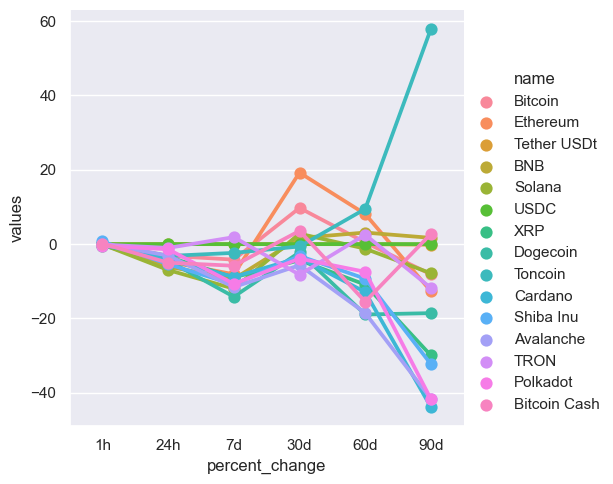

In [60]:
sns.catplot(x='percent_change', y= 'values', hue = 'name', data = df7, kind = 'point')